# Figure 6

This notebook produces all subpanels of Figure 6, other auxillary figures, and the related statistical analysis.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
from scipy import stats

## Get data

We load the data produced by the previous workflow stored as `../data/results/pej0_GrIS_classification.csv`. See `Fig5.ipynb` for more details.

In [2]:
df = pd.read_csv('../data/results/pej0_GrIS_classification.csv')
df

$\frac{P_e}{\ell}$ (m$^{-1}$)  $J_0$ (m yr$^{-1}$)  \
0                         0.000021          -915.378881   
1                         0.000306          -200.805053   
2                        -0.000047           -82.857761   
3                        -0.000034          -450.936824   
4                         0.000078         -1243.208582   
..                             ...                  ...   
99                        0.000234          -112.716518   
100                       0.000044          -167.859915   
101                       0.000054         -1081.388452   
102                       0.000315             5.479272   
103                       0.000231          -222.535111   

     Speed diff (m yr$^{-1}$)  Speed diff (%)  Advance (km)  
0                 3029.186179       66.610459         -17.0  
1                  511.123464       84.192696          -2.3  
2                  456.284207       55.293407          -3.0  
3                 -435.655180      -12.603562          -0.3  
4                 -349.572187       -8.164585          -0.2  
..                        ...             ...           ...  
99                 613.747370       34.516832          -0.9  
100               1023.168837       55.202543          -4.1  
101               2774.927415       51.468309          -8.8  
102                467.138448       31.283371          -0.9  
103                573.128198       41.697811          -4.1  

[104 rows x 5 columns]

This histogram gives a quick idea about the distribution of speed change in both absolute difference (the first histogram) and percentage difference (the second histogram). We use the absolute difference for the following analysis because it shows many outliers away from the peaked distribution centered at around 0 m/yr.

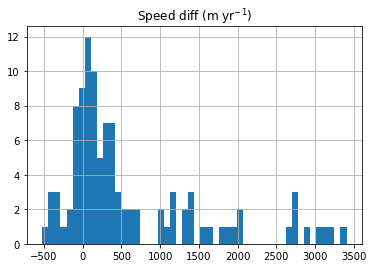

In [3]:
df.hist(column='Speed diff (m yr$^{-1}$)', bins=50);

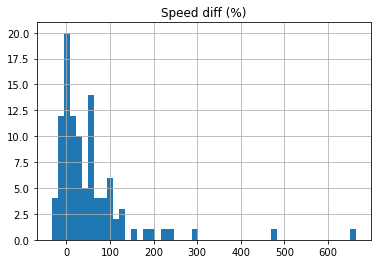

In [4]:
df.hist(column='Speed diff (%)', bins=50);

## Figure 6A

### Visualization

We add a new column called `Legend` and classify the glaciers based on a simple threshold of speed change (here set to $\pm$300 m/yr):

In [5]:
newclass = []
count = 0
for idx, row in df.iterrows():
    if row['Speed diff (m yr$^{-1}$)'] >= 300 or row['Speed diff (m yr$^{-1}$)'] <= -300:
        newclass.append(r'$|\Delta V| \geq$ 300 m yr$^{-1}$')
        count += 1
    else:
        newclass.append(r'$|\Delta V| <$ 300 m yr$^{-1}$')

df['Legend'] = newclass
print('How many glaciers have a higher speed change?: {}'.format(count))
print('How many glaciers have a lower speed change?:  {}'.format(len(df) - count))

How many glaciers have a higher speed change?: 54
How many glaciers have a lower speed change?:  50


Now we plot **Figure 6A**:

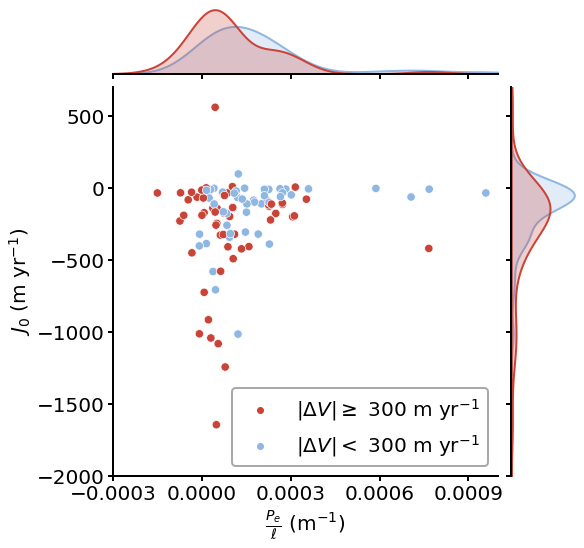

In [6]:
matplotlib.rc('font', size=20)
matplotlib.rc('axes', linewidth=2)

cmap = {r'$|\Delta V| \geq$ 300 m yr$^{-1}$': '#C94337', r'$|\Delta V| <$ 300 m yr$^{-1}$': '#8EB7E4'}
f = sns.jointplot(data=df, x=r'$\frac{P_e}{\ell}$ (m$^{-1}$)', y=r'$J_0$ (m yr$^{-1}$)', hue="Legend", palette=cmap, 
                  joint_kws={"s": 70, }, marginal_kws={'linewidth': 2}, height=8)
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.set_xticks([-0.0003, 0, 0.0003, 0.0006, 0.0009])
f.ax_joint.tick_params(width=2, length=5)
f.ax_marg_x.tick_params(width=2, length=5)
f.ax_marg_y.tick_params(width=2, length=5)
legend = f.ax_joint.legend(loc='lower right')
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('xkcd:gray')
f.savefig('../data/results/Fig6-1.pdf')

### Statistical analysis

We use the two-sample **Kolmogorov-Smirnov test** to determine if the two kernel distributions shown in **Figure 6A** are drawn from the same probability distribution. The test is one dimensional, so we need to perform this twice, one for each axis.

In [7]:
unstable_j0 = df[df['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
unstable_pe = df[df['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']
stable_j0 = df[df['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
stable_pe = df[df['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']

We use the `kstest` fuction from the `scipy` package and perform a two-sided Kolmogorov–Smirnov test. The p value is sufficiently small to reject the null hypothesis that both kernels are drawn from the same probability distribution under a 95% confidence level.

In [8]:
stats.kstest(unstable_j0, stable_j0)

KstestResult(statistic=0.3451851851851852, pvalue=0.0028360448053456055)

In [9]:
stats.kstest(unstable_pe, stable_pe)

KstestResult(statistic=0.3237037037037037, pvalue=0.006217578940975077)

## Figure 6B

First, this scatter plot shows how speed change and terminal retreat correlate to each other, motivating the needs to isolate that forcing in **Figures 6B-C**:

<AxesSubplot:xlabel='Speed diff (m yr$^{-1}$)', ylabel='Advance (km)'>

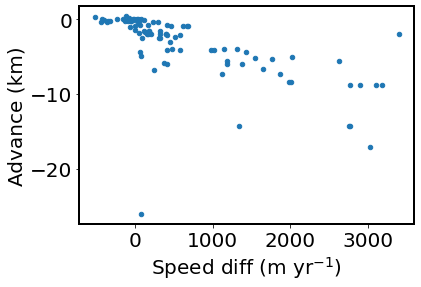

In [10]:
df.plot(x='Speed diff (m yr$^{-1}$)', y='Advance (km)', kind='scatter')

First, let's select glaciers with retreat > 0.5 km and plot them in **Figure 6B** using the same way as Figure 6A.

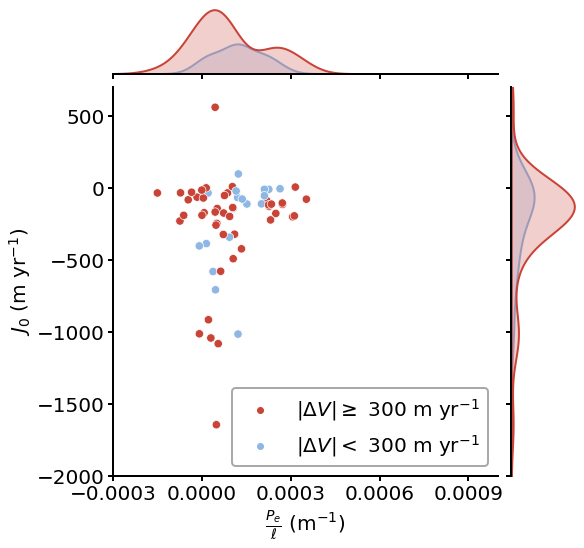

In [11]:
df_1 = df.loc[df['Advance (km)'] < -0.5]

cmap = {r'$|\Delta V| \geq$ 300 m yr$^{-1}$': '#C94337', r'$|\Delta V| <$ 300 m yr$^{-1}$': '#8EB7E4'}
f = sns.jointplot(data=df_1, x=r'$\frac{P_e}{\ell}$ (m$^{-1}$)', y=r'$J_0$ (m yr$^{-1}$)', hue="Legend", palette=cmap, 
                  joint_kws={"s": 70, }, marginal_kws={'linewidth': 2}, height=8)
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.set_xticks([-0.0003, 0, 0.0003, 0.0006, 0.0009])
f.ax_joint.tick_params(width=2, length=5)
f.ax_marg_x.tick_params(width=2, length=5)
f.ax_marg_y.tick_params(width=2, length=5)
legend = f.ax_joint.legend(loc='lower right')
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('xkcd:gray')
f.savefig('../data/results/Fig6-2.pdf')

Below is the same statistical test for this subset. Separation of $P_e / \ell$ is still significant, but $J_0$ is not.

In [12]:
unstable_j0_1 = df_1[df_1['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
unstable_pe_1 = df_1[df_1['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']
stable_j0_1 = df_1[df_1['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
stable_pe_1 = df_1[df_1['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']

In [13]:
stats.kstest(unstable_j0_1, stable_j0_1)

KstestResult(statistic=0.24154589371980675, pvalue=0.3662958100582304)

In [14]:
stats.kstest(unstable_pe_1, stable_pe_1)

KstestResult(statistic=0.36231884057971014, pvalue=0.04984912204217817)

## Figure 6C

Now let's select glaciers with retreat < 0.5 km and plot them in **Figure 6C** using the same way as Figure 6A.

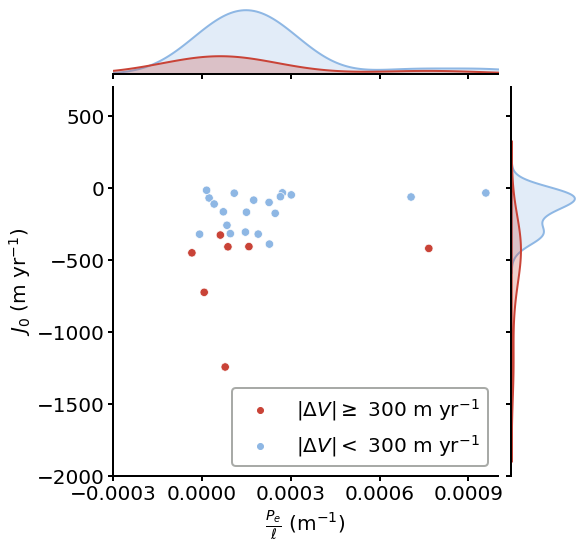

In [15]:
df_2 = df.loc[df['Advance (km)'] > -0.5]

cmap = {r'$|\Delta V| \geq$ 300 m yr$^{-1}$': '#C94337', r'$|\Delta V| <$ 300 m yr$^{-1}$': '#8EB7E4'}
f = sns.jointplot(data=df_2, x=r'$\frac{P_e}{\ell}$ (m$^{-1}$)', y=r'$J_0$ (m yr$^{-1}$)', hue="Legend", palette=cmap, 
                  joint_kws={"s": 70, }, marginal_kws={'linewidth': 2}, height=8)
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.set_xticks([-0.0003, 0, 0.0003, 0.0006, 0.0009])
f.ax_joint.tick_params(width=2, length=5)
f.ax_marg_x.tick_params(width=2, length=5)
f.ax_marg_y.tick_params(width=2, length=5)
legend = f.ax_joint.legend(loc='lower right')
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('xkcd:gray')
f.savefig('../data/results/Fig6-3.pdf')

Below is the same statistical test for this subset. Separation of $J_0$ is now significant, but $P_e / \ell$ is not.

In [16]:
unstable_j0_2 = df_2[df_2['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
unstable_pe_2 = df_2[df_2['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']
stable_j0_2 = df_2[df_2['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
stable_pe_2 = df_2[df_2['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']

In [17]:
stats.kstest(unstable_j0_2, stable_j0_2)

KstestResult(statistic=0.95, pvalue=1.8017409321613442e-05)

In [18]:
stats.kstest(unstable_pe_2, stable_pe_2)

KstestResult(statistic=0.4142857142857143, pvalue=0.25506683332770297)